#### **Imports**

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import quad
import pandas as pd
from scipy.optimize import minimize
from matplotlib.ticker import AutoMinorLocator

colors = ['crimson','midnightblue', 'violet','orange','springgreen','dodgerblue','darkviolet', 'olive','tomato']
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colors)

#### **Problem 1**

##### **Problem 1a**

In [40]:
def mass_to_temperature(mass):
    Temp = (1.057 * 10**13) / mass # Mass in [g]
    return Temp

def norm_neutrino_pdf(energy,mass,lower_limit,upper_limit):
    
    Temperature = mass_to_temperature(mass)
        
    lambda_function = lambda Ev: (np.exp(Ev / Temperature) - 1 ) / ( np.exp(Ev / Temperature) + 3 ) * ( 1  / ( np.exp(Ev / Temperature) + 1 ) )
    
    area , area_error = quad(lambda_function,lower_limit, upper_limit)
    
    scale = 1 / area
    
    return lambda_function(energy) * scale

In [41]:
BH_1 = 2.5 * 10**11 
BH_2 = 4. * 10**11 
BH_3 = 9. * 10**11 

Lower_energy , Upper_energy = 0 , 500 # Set limits of integration

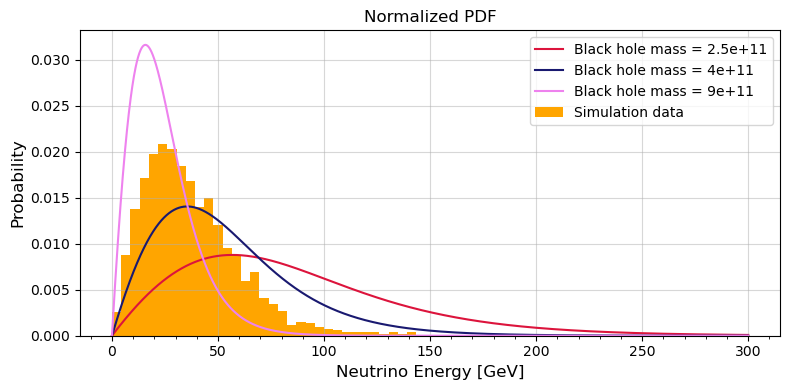

In [51]:
plt.figure(figsize = (8,4))

energy_range = np.linspace(Lower_energy,300,2000) # From 0 GeV to 250 GeV

plt.plot(energy_range,norm_neutrino_pdf(energy_range,BH_1,Lower_energy,Upper_energy),
         label=fr'Black hole mass = {BH_1:.03}',linestyle='-')
plt.plot(energy_range,norm_neutrino_pdf(energy_range,BH_2,Lower_energy,Upper_energy),
         label=fr'Black hole mass = {BH_2:.03}',linestyle='-')
plt.plot(energy_range,norm_neutrino_pdf(energy_range,BH_3,Lower_energy,Upper_energy),
         label=fr'Black hole mass = {BH_3:.03}',linestyle='-')

ax = plt.gca() # For setting sub-ticks
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.tick_params(which='minor', length=2, color='k')

plt.title('Normalized PDF',fontsize=12)
plt.xlabel('Neutrino Energy [GeV]',fontsize=12)
plt.ylabel('Probability',fontsize=12)
plt.legend(loc = 'best',frameon = True)
plt.grid(True,alpha=0.5)
plt.tight_layout()

##### **Problem 1b**

In [52]:
df_neutrino = pd.read_csv('neutrino_energies.csv',header='infer')
df_neutrino.columns = ['Energies']
neutrino_energies = df_neutrino['Energies'].values

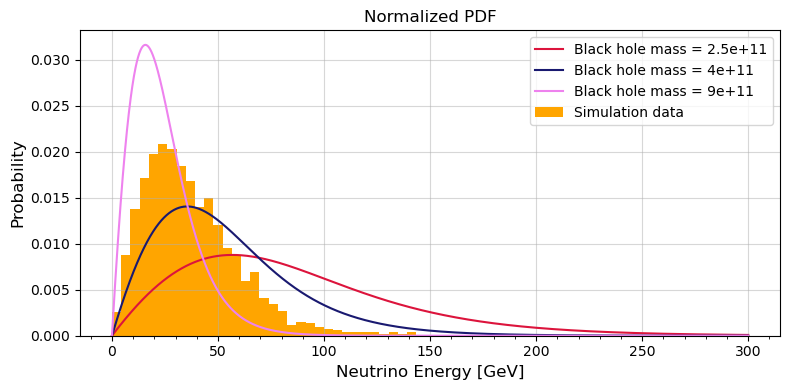

In [53]:
plt.figure(figsize = (8,4))

energy_range = np.linspace(Lower_energy,300,2000) # From 0 GeV to 250 GeV

plt.plot(energy_range,norm_neutrino_pdf(energy_range,BH_1,Lower_energy,Upper_energy),
         label=fr'Black hole mass = {BH_1:.03}',linestyle='-')
plt.plot(energy_range,norm_neutrino_pdf(energy_range,BH_2,Lower_energy,Upper_energy),
         label=fr'Black hole mass = {BH_2:.03}',linestyle='-')
plt.plot(energy_range,norm_neutrino_pdf(energy_range,BH_3,Lower_energy,Upper_energy),
         label=fr'Black hole mass = {BH_3:.03}',linestyle='-')
plt.hist(neutrino_energies,bins=np.linspace(0.,300.,70),density=True,label = r'Simulation data')

ax = plt.gca() # For setting sub-ticks
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.tick_params(which='minor', length=2, color='k')

plt.title('Normalized PDF',fontsize=12)
plt.xlabel('Neutrino Energy [GeV]',fontsize=12)
plt.ylabel('Probability',fontsize=12)
plt.legend(loc = 'best',frameon = True)
plt.grid(True,alpha=0.5)
plt.tight_layout()

##### **Problem 1c**

##### **Problem 1d**

#### **Problem 2**